In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('../TextFiles/moviereviews.tsv',sep='\t')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
df.dropna(inplace=True)

In [5]:
blanks=[]
for i,lb,rv in df.itertuples():
    if type(rv)==str:
        if rv.isspace():
            blanks.append(i)
    

In [6]:
df.drop(blanks,inplace=True)

In [7]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
sid = SentimentIntensityAnalyzer()

In [10]:
df['scores'] = df['review'].apply(lambda review:sid.polarity_scores(review))

In [11]:
df['compound'] = df['scores'].apply(lambda d: d['compound'])



In [30]:
df['pos'] = df['scores'].apply(lambda d: d['pos'])
df['neg'] = df['scores'].apply(lambda d: d['neg'])
df['neu'] = df['scores'].apply(lambda d: d['neu'])

In [31]:
df.head()

,label,review,scores,compound,comp_score,pos,neg,neu
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125,neg,0.101,0.121,0.778
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618,neg,0.105,0.120,0.775
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...",0.9951,pos,0.150,0.068,0.781
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...",0.9972,pos,0.147,0.071,0.782
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...",-0.2484,neg,0.093,0.091,0.817


In [15]:
df['comp_score']=df['compound'].apply(lambda score: 'pos' if score >= 0 else 'neg')

In [46]:
df['diff_score']=df['scores'].apply(lambda score: 'pos' if score['pos'] >=score['neg']+0.05 else 'neg')

In [38]:
df.head()

,label,review,scores,compound,comp_score,pos,neg,neu,diff_score
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125,neg,0.101,0.121,0.778,neg
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618,neg,0.105,0.120,0.775,neg
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...",0.9951,pos,0.150,0.068,0.781,pos
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...",0.9972,pos,0.147,0.071,0.782,pos
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...",-0.2484,neg,0.093,0.091,0.817,neg


In [17]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [47]:
accuracy_score(df['label'],df['diff_score'])

0.6718266253869969

In [48]:
print(classification_report(df['label'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.72      0.44      0.55       969
         pos       0.60      0.83      0.70       969

    accuracy                           0.64      1938
   macro avg       0.66      0.64      0.62      1938
weighted avg       0.66      0.64      0.62      1938



In [20]:
print(confusion_matrix(df['label'],df['comp_score']))

[[427 542]
 [164 805]]


In [21]:
import seaborn as sns


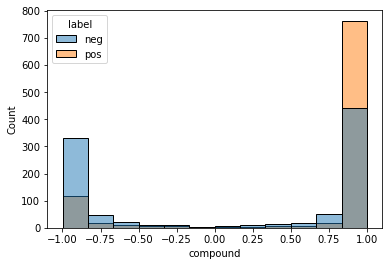

In [50]:
ax = sns.histplot(x="compound", hue="label",
                 data=df)

In [ ]:
ax = sns.histplot(x="compound", hue="label",
                 data=df[df['label']=='neg'])